In [1]:
import os
import pandas as pd
import pathlib

def flatten_record(record):
    """
    Flatten dictionary entries so that nested dictionaries are converted into flat key names.
    For example, a key 'param_seeds_init' with value {'wnd_size': 1500, ...}
    will become keys like 'param_seeds_init_wnd_size', etc.
    """
    flat = {}
    for key, value in record.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flat[f"{key}_{subkey}"] = subvalue
        else:
            flat[key] = value
    return flat

# List of session IDs
#this is stupid as i can just use the variables as before, but whatever.... guess never use this function ever so no one cares...
session_ids = [
    '202401015-PMC-r1',
    '202401015-PMC-r2',
    '20240717-PMC-r1',
    '20240819-V1-r1',
    '20240910-V1-R',
    '20240916-V1-R1',
    '20240916-V1-R2',
    '20240919V1L5',
    '20241001-PMC-r2',
    '20241002-PMC-R1',
    '20241002-pmc-r2'
]

# Base path to the sessions
base_path = "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted"

records = []

for session in session_ids:
    file_path = os.path.join(base_path, session, "customEntValHere", "minian_param_mir.py")
    # Provide a value for __file__ in the exec context to avoid the error
    local_vars = {"__file__": file_path}
    try:
        with open(file_path, 'r') as f:
            code = f.read()
        # Execute the parameter file in a controlled namespace
        exec(code, {}, local_vars)
        # Start building the record with the session id
        record = {'session': session}
        # Extract keys starting with 'param_' or specific variables like 'noise_freq', 'sparse_penal'
        for key, value in local_vars.items():
            if key.startswith('param_') or key in ['noise_freq', 'sparse_penal']:
                record[key] = value
        records.append(record)
    except Exception as e:
        print(f"Error processing {session}: {e}")

if records:
    # Flatten the records to make analysis easier
    flattened_records = [flatten_record(rec) for rec in records]
    df_flat = pd.DataFrame(flattened_records)
    print("Extracted Parameters:")
    print(df_flat)
else:
    print("No records processed.")


Extracted Parameters:
             session  param_seeds_init_wnd_size param_seeds_init_method  \
0   202401015-PMC-r1                        700                 rolling   
1   202401015-PMC-r2                       1500                 rolling   
2    20240717-PMC-r1                       1500                 rolling   
3     20240819-V1-r1                        700                 rolling   
4      20240910-V1-R                       1500                 rolling   
5     20240916-V1-R1                        700                 rolling   
6     20240916-V1-R2                       1500                 rolling   
7       20240919V1L5                       1500                 rolling   
8    20241001-PMC-r2                       1500                 rolling   
9    20241002-PMC-R1                       1500                 rolling   
10   20241002-pmc-r2                       1500                 rolling   

    param_seeds_init_stp_size  param_seeds_init_max_wnd  \
0                 

Extracted Parameters:
             session  param_seeds_init_wnd_size param_seeds_init_method  \
0   202401015-PMC-r1                        700                 rolling   
1   202401015-PMC-r2                       1500                 rolling   
2    20240717-PMC-r1                       1500                 rolling   
3     20240819-V1-r1                        700                 rolling   
4      20240910-V1-R                       1500                 rolling   
5     20240916-V1-R1                        700                 rolling   
6     20240916-V1-R2                       1500                 rolling   
7       20240919V1L5                       1500                 rolling   
8    20241001-PMC-r2                       1500                 rolling   
9    20241002-PMC-R1                       1500                 rolling   
10   20241002-pmc-r2                       1500                 rolling   

    param_seeds_init_stp_size  param_seeds_init_max_wnd  \
0                 

<Figure size 640x480 with 0 Axes>

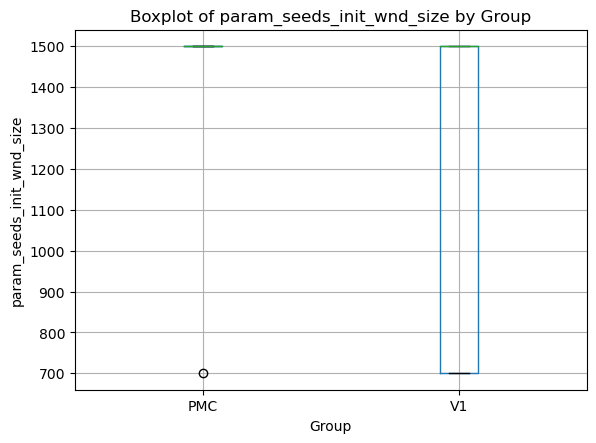

<Figure size 640x480 with 0 Axes>

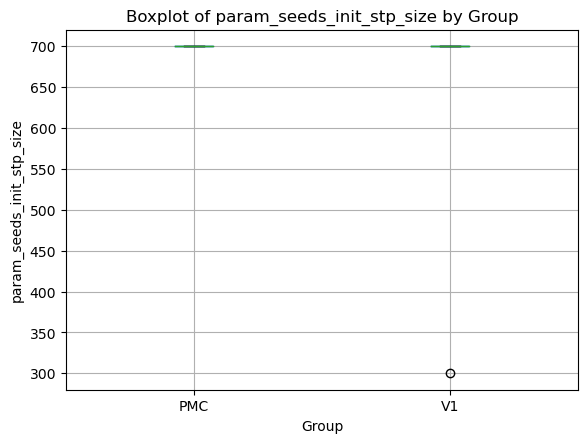

<Figure size 640x480 with 0 Axes>

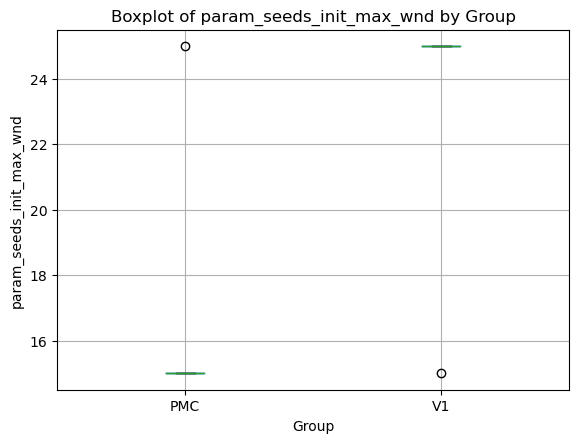

<Figure size 640x480 with 0 Axes>

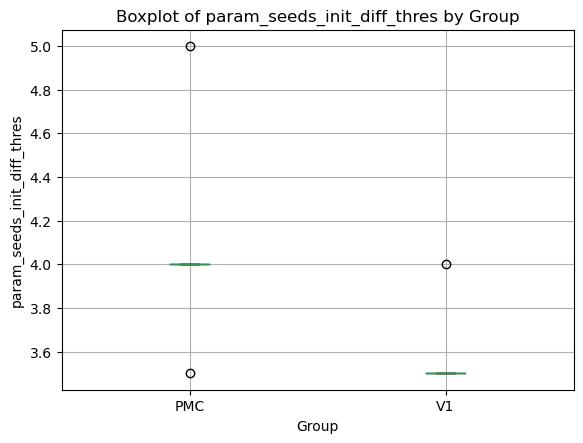

<Figure size 640x480 with 0 Axes>

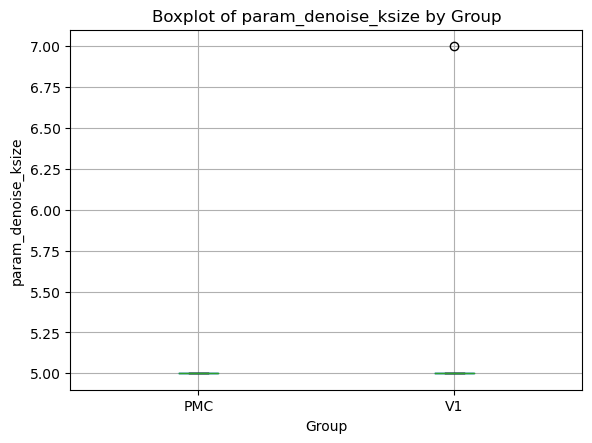

<Figure size 640x480 with 0 Axes>

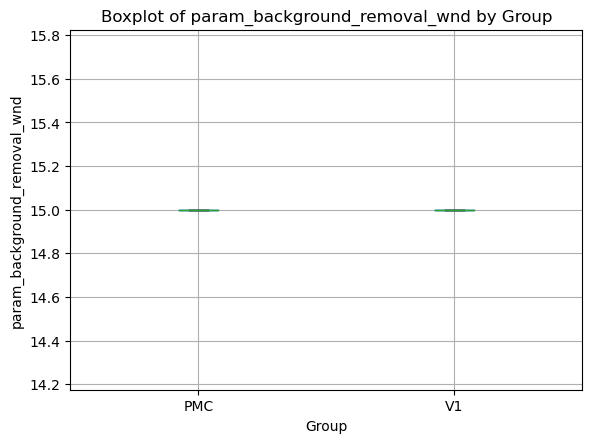

<Figure size 640x480 with 0 Axes>

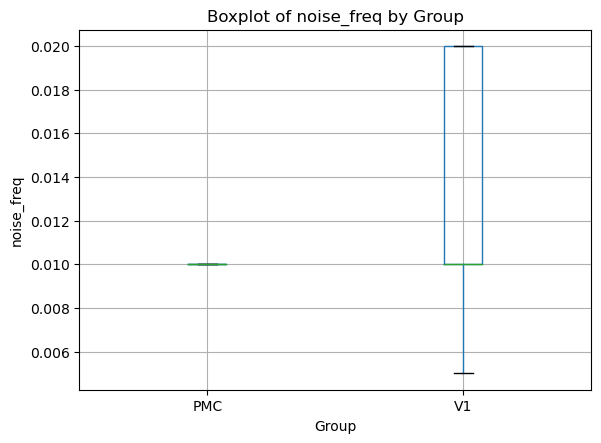

<Figure size 640x480 with 0 Axes>

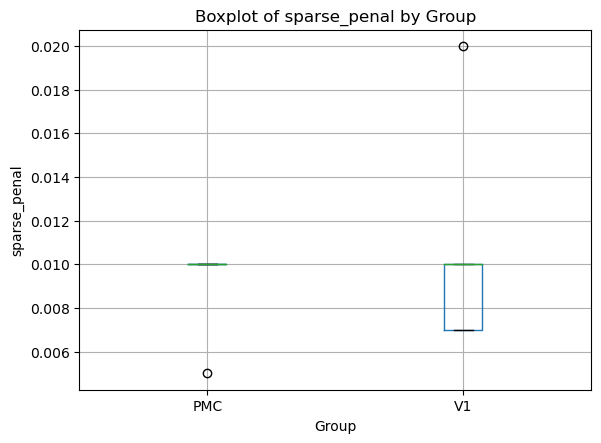

<Figure size 640x480 with 0 Axes>

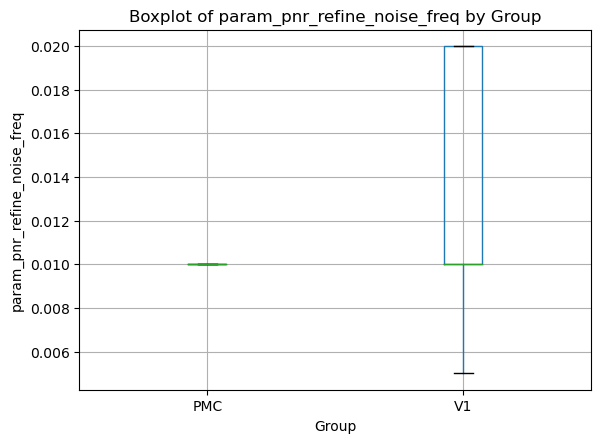

<Figure size 640x480 with 0 Axes>

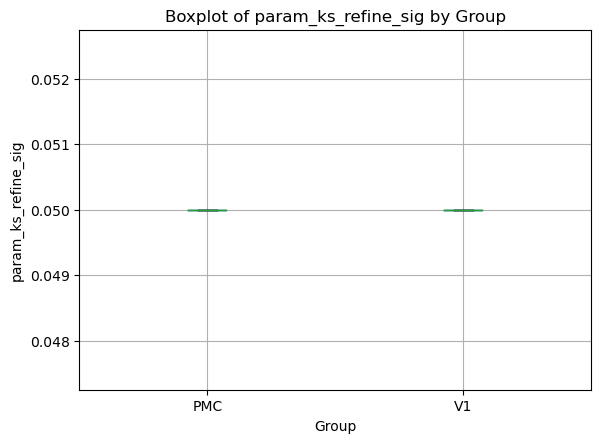

<Figure size 640x480 with 0 Axes>

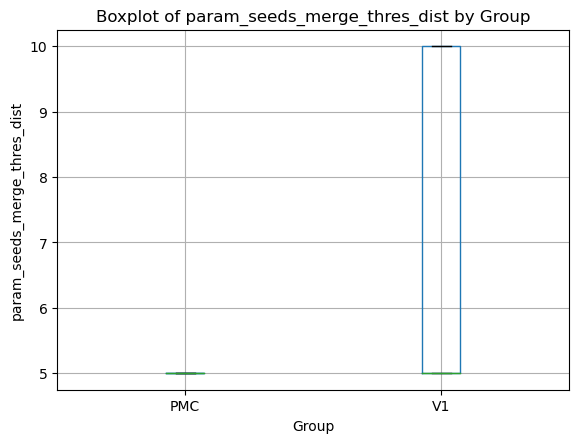

<Figure size 640x480 with 0 Axes>

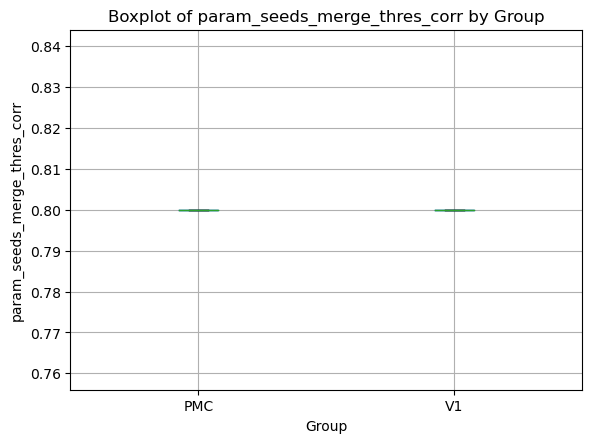

<Figure size 640x480 with 0 Axes>

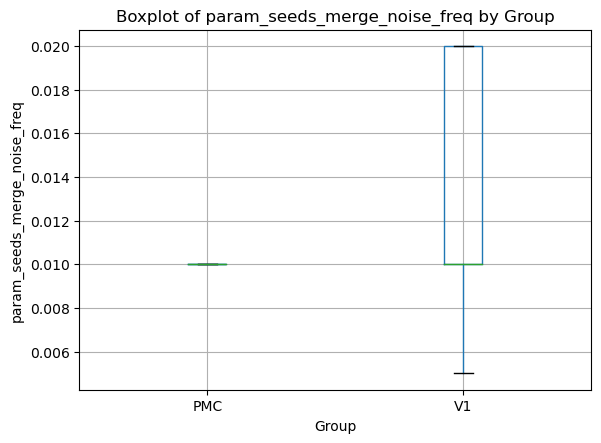

<Figure size 640x480 with 0 Axes>

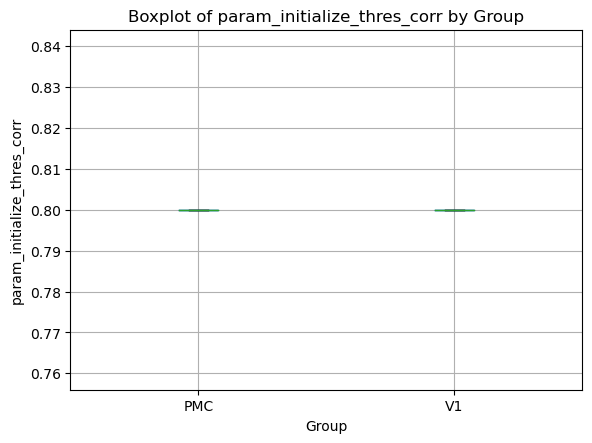

<Figure size 640x480 with 0 Axes>

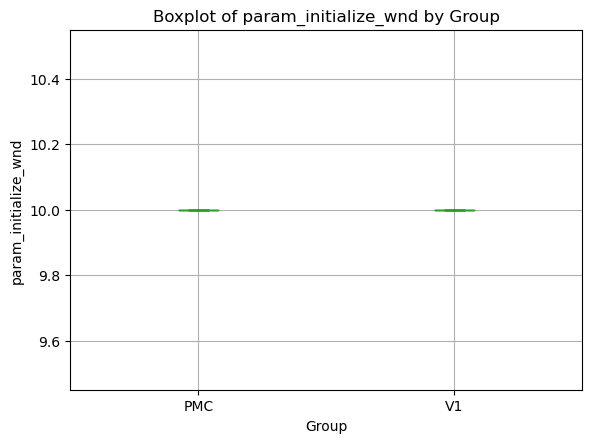

<Figure size 640x480 with 0 Axes>

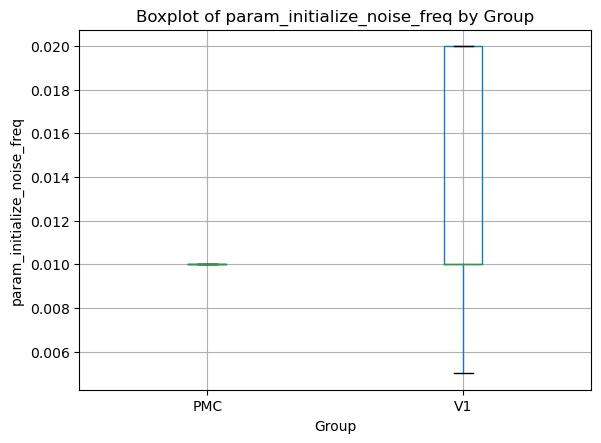

<Figure size 640x480 with 0 Axes>

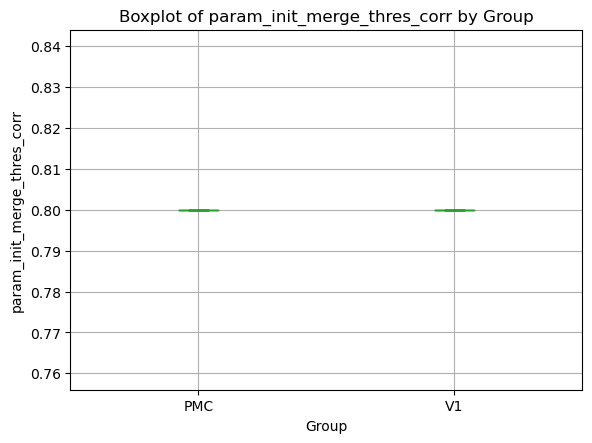

<Figure size 640x480 with 0 Axes>

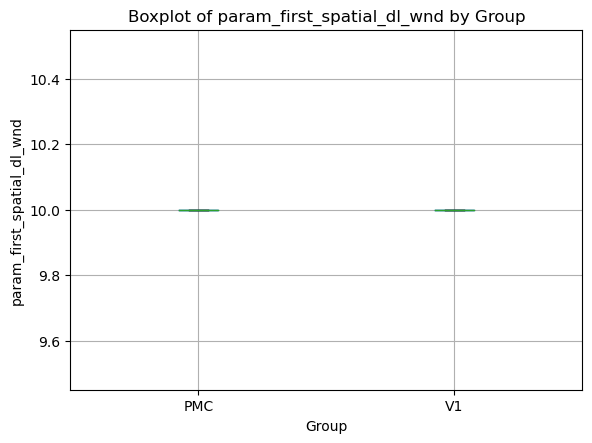

<Figure size 640x480 with 0 Axes>

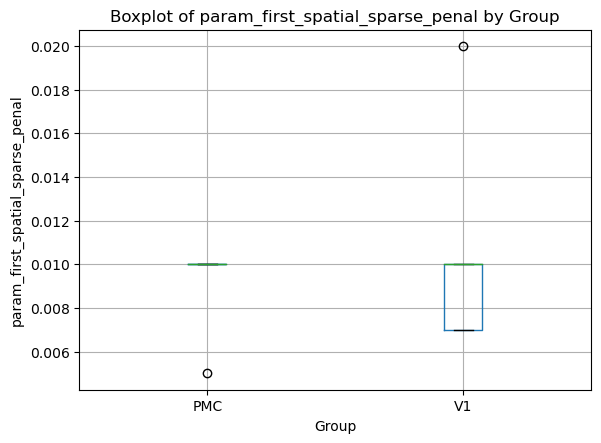

<Figure size 640x480 with 0 Axes>

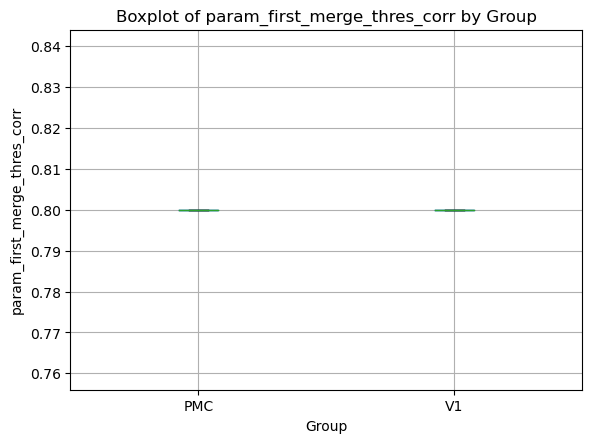

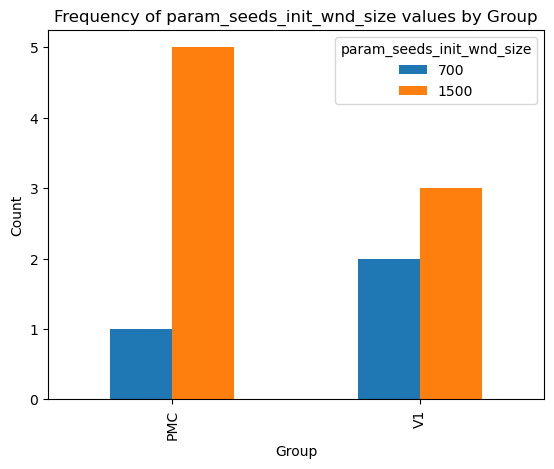

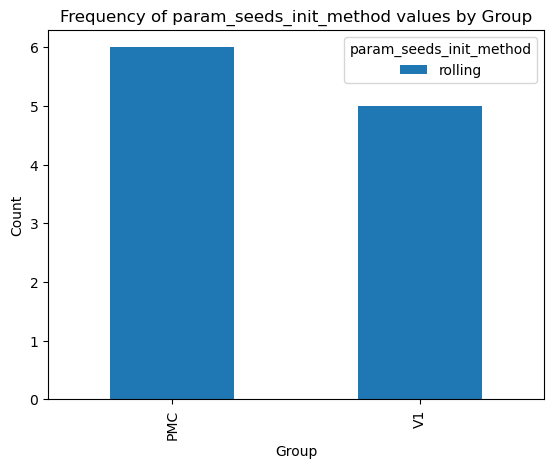

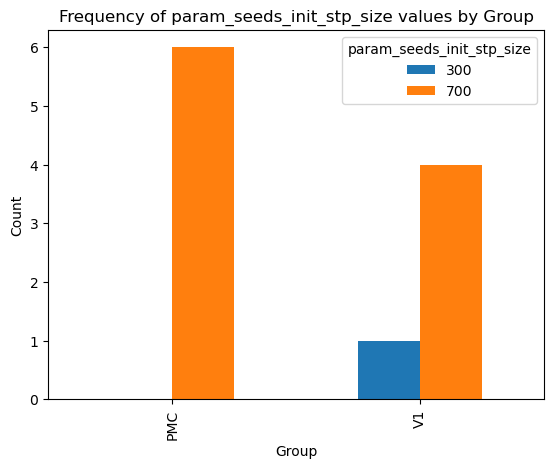

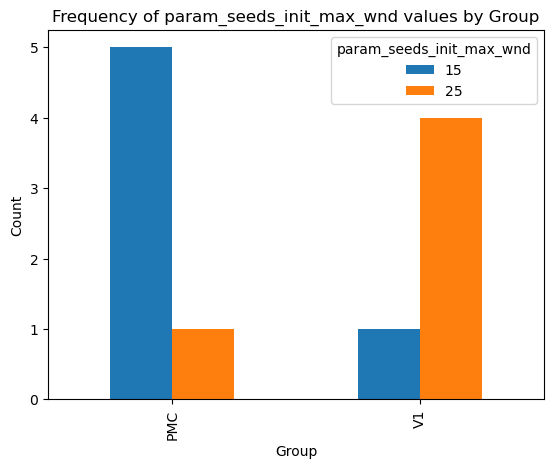

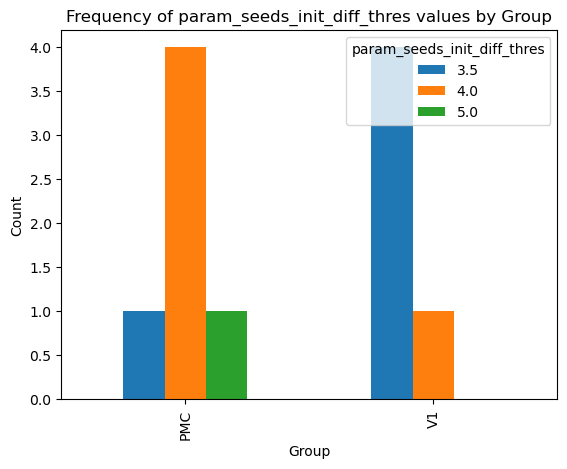

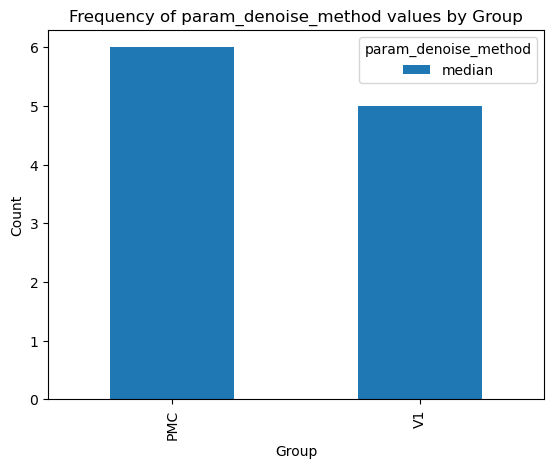

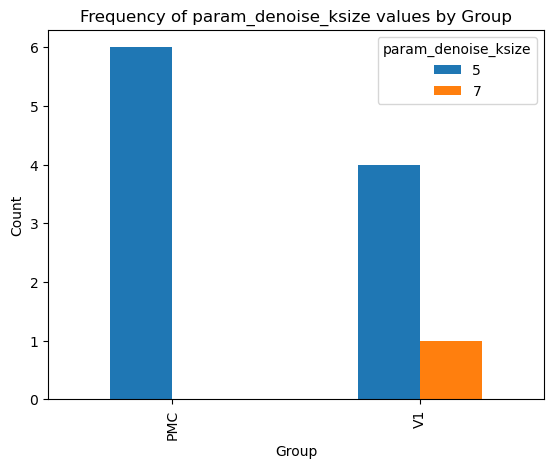

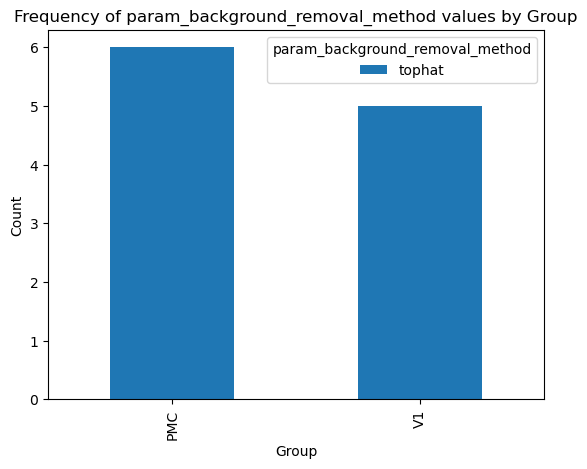

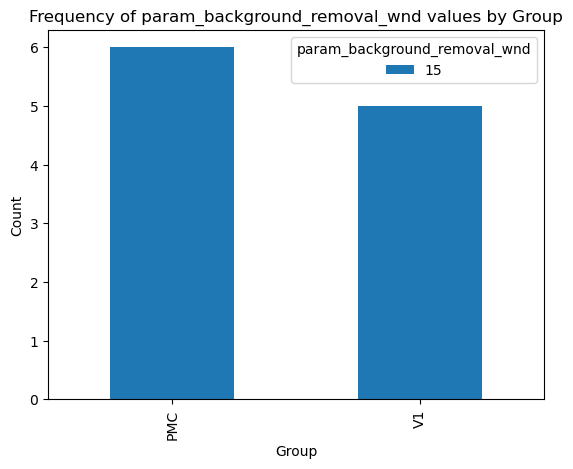

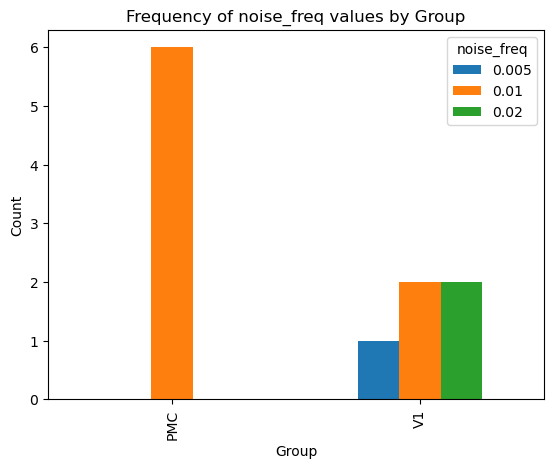

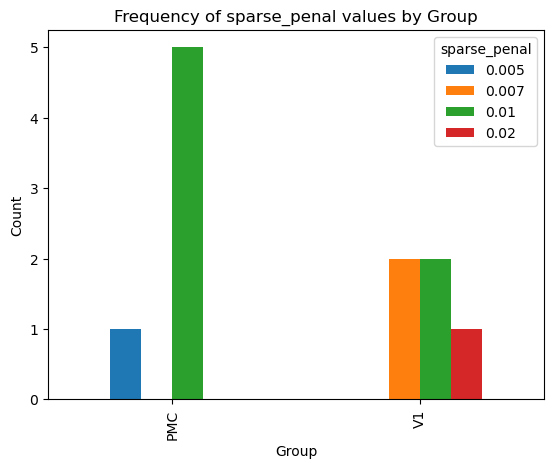

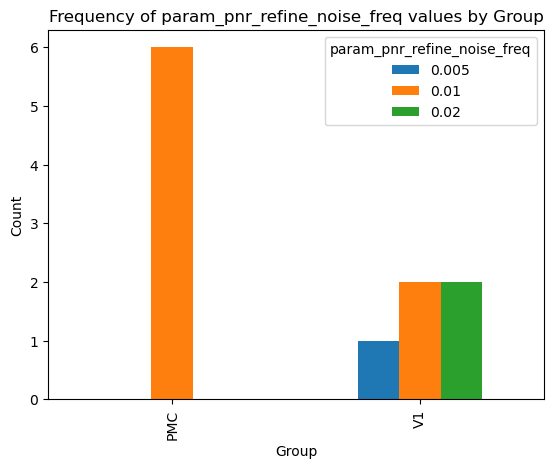

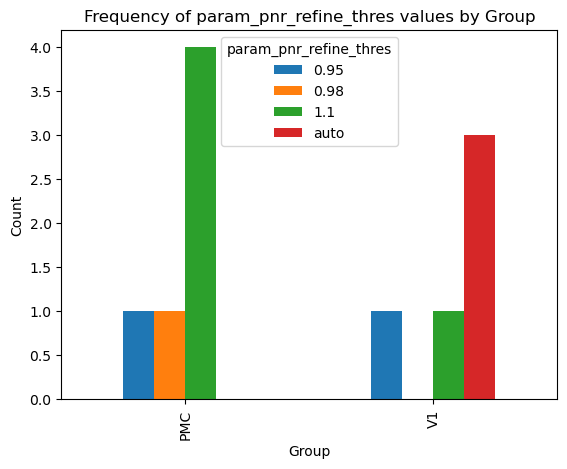

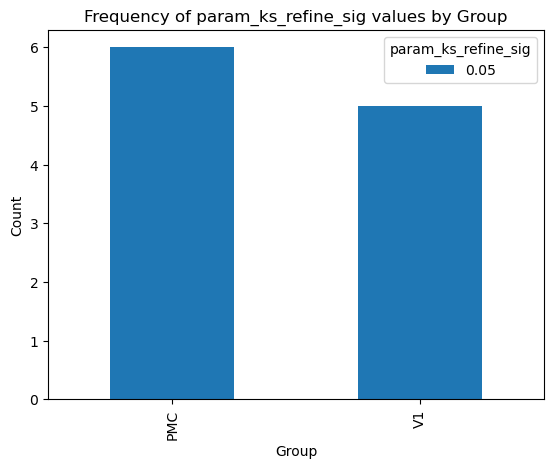

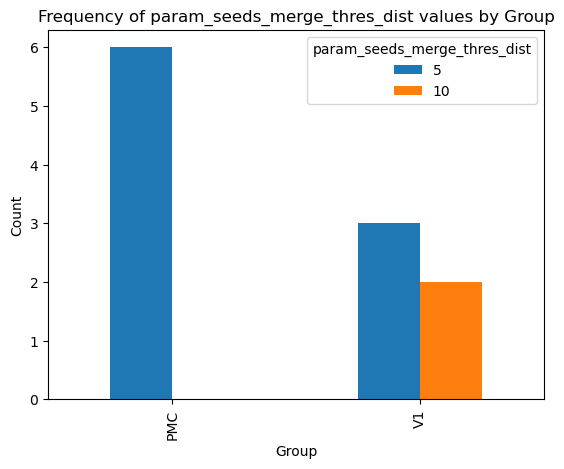

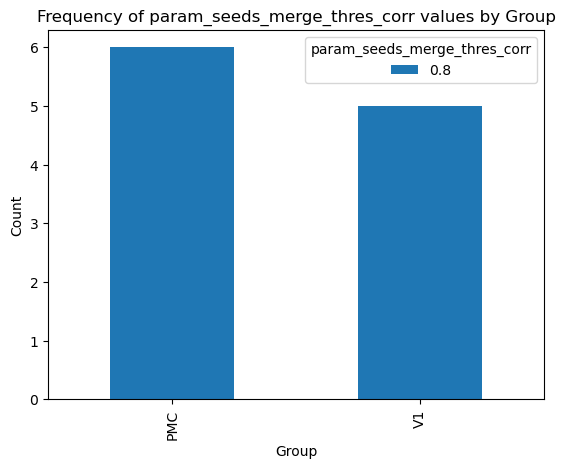

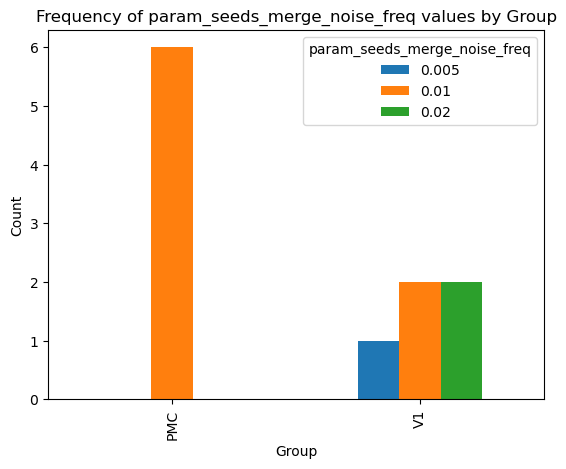

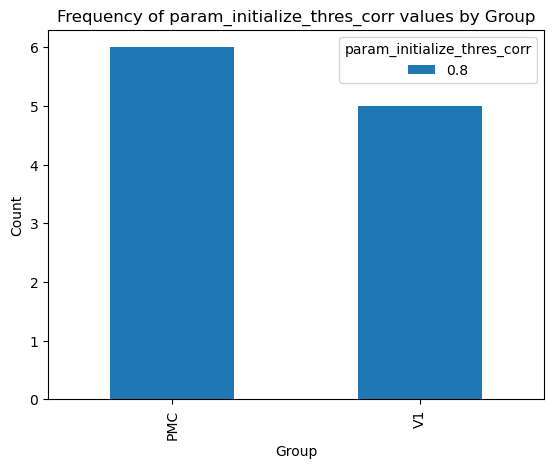

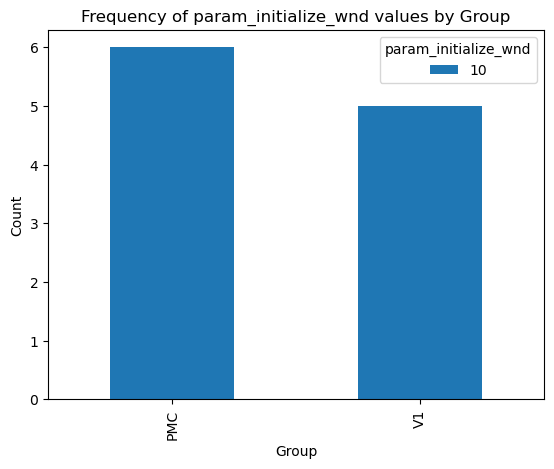

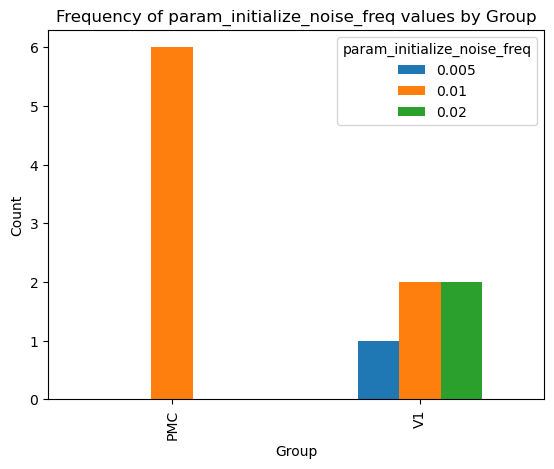

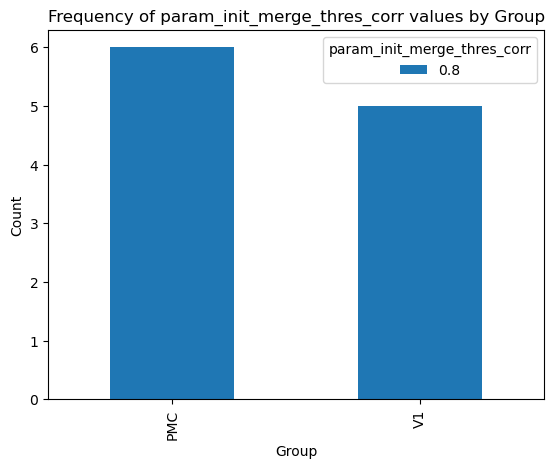

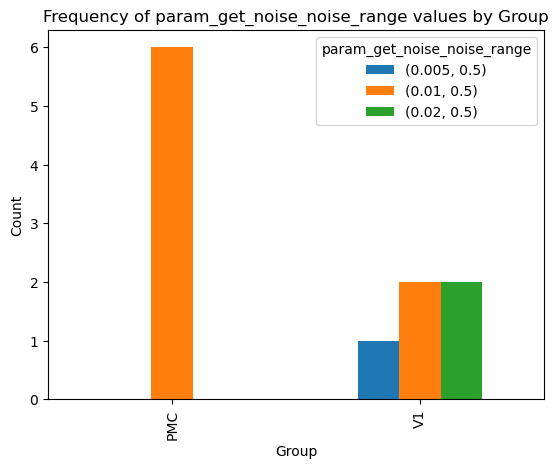

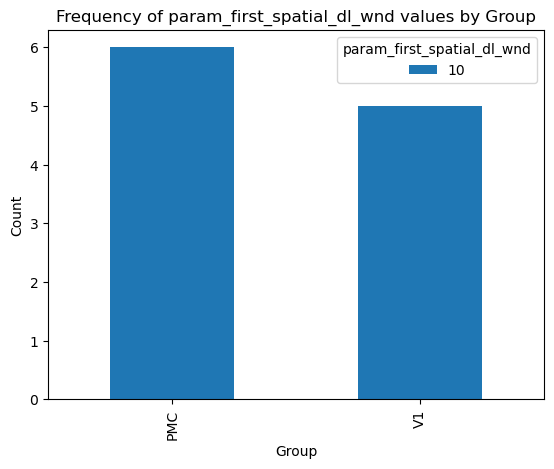

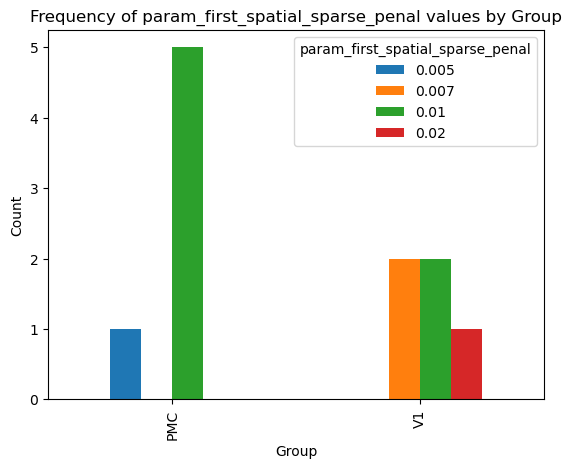

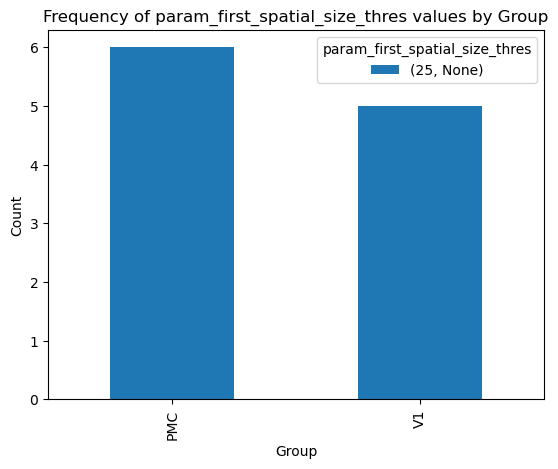

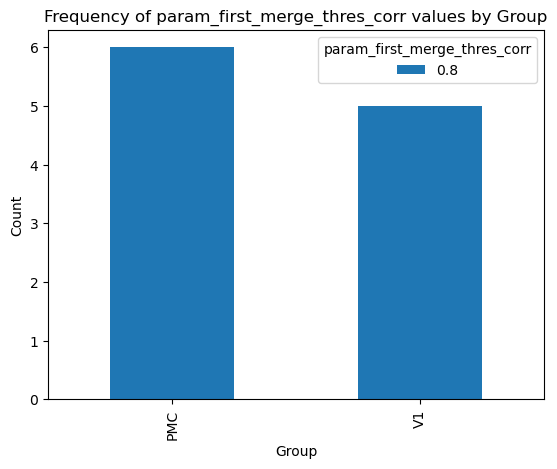

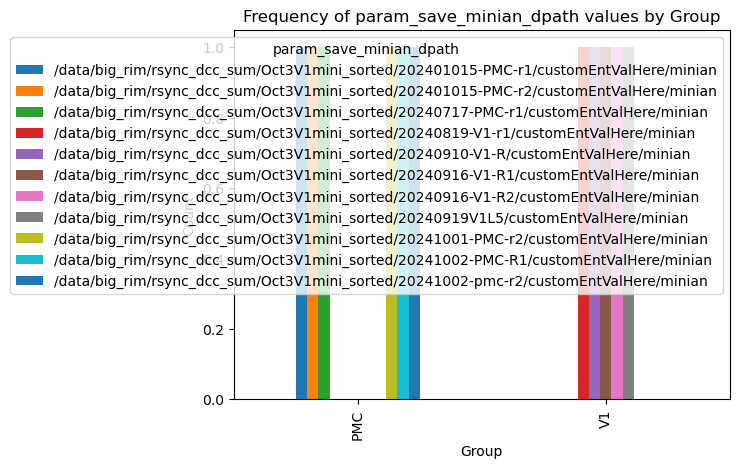

TypeError: unhashable type: 'dict'

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def flatten_record(record):
    """
    Flatten dictionary entries so that nested dictionaries are converted
    into flat key names. For example, a key 'param_seeds_init' with value 
    {'wnd_size': 1500, ...} will become keys like 'param_seeds_init_wnd_size', etc.
    """
    flat = {}
    for key, value in record.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                flat[f"{key}_{subkey}"] = subvalue
        else:
            flat[key] = value
    return flat

def extract_group(session):
    """
    Returns a group label based on the session string.
    Assumes that if the session string contains 'PMC' (case-insensitive),
    the group is 'PMC', and if it contains 'V1', then 'V1'.
    """
    session_upper = session.upper()
    if "PMC" in session_upper:
        return "PMC"
    elif "V1" in session_upper:
        return "V1"
    else:
        return "Unknown"

def extract_parameters():
    """
    Loops over a list of session IDs, executes the parameter file for each (injecting __file__),
    extracts parameters (keys starting with 'param_' or other specified keys), and flattens
    the nested dictionaries.
    """
    session_ids = [
        '202401015-PMC-r1',
        '202401015-PMC-r2',
        '20240717-PMC-r1',
        '20240819-V1-r1',
        '20240910-V1-R',
        '20240916-V1-R1',
        '20240916-V1-R2',
        '20240919V1L5',
        '20241001-PMC-r2',
        '20241002-PMC-R1',
        '20241002-pmc-r2'
    ]
    
    base_path = "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted"
    records = []
    
    for session in session_ids:
        file_path = os.path.join(base_path, session, "customEntValHere", "minian_param_mir.py")
        # Inject a value for __file__ to avoid errors in the parameter file
        local_vars = {"__file__": file_path}
        try:
            with open(file_path, 'r') as f:
                code = f.read()
            # Execute the file in a controlled namespace
            exec(code, {}, local_vars)
            # Build a record for the session
            record = {'session': session}
            for key, value in local_vars.items():
                if key.startswith('param_') or key in ['noise_freq', 'sparse_penal']:
                    record[key] = value
            records.append(record)
        except Exception as e:
            print(f"Error processing {session}: {e}")
    
    if records:
        flattened_records = [flatten_record(rec) for rec in records]
        df_flat = pd.DataFrame(flattened_records)
        return df_flat
    else:
        return None

def visualize_parameters(df):
    """
    Adds a 'group' column (PMC or V1) to the dataframe based on the session name,
    and then produces a set of visualizations:
      - For numeric parameters: boxplots comparing groups.
      - For categorical parameters: bar charts showing group frequencies.
    """
    # Create a new column for group membership
    df['group'] = df['session'].apply(extract_group)
    
    # --- Numeric Parameters ---
    # Identify numeric columns (ignoring 'session' and 'group')
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    for col in numeric_cols:
        # Skip the 'group' column if it appears here
        if col in ['group']:
            continue
        plt.figure()
        df.boxplot(column=col, by='group')
        plt.title(f'Boxplot of {col} by Group')
        plt.suptitle('')  # Remove the default subtitle
        plt.xlabel('Group')
        plt.ylabel(col)
        plt.show()
    
    # --- Categorical Parameters ---
    # Heuristic: treat columns that are of type object or have a small number of unique values as categorical.
    categorical_cols = []
    for col in df.columns:
        if col in ['session', 'group']:
            continue
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            categorical_cols.append(col)
    
    for col in categorical_cols:
        ct = pd.crosstab(df['group'], df[col])
        ct.plot(kind='bar')
        plt.title(f'Frequency of {col} values by Group')
        plt.xlabel('Group')
        plt.ylabel('Count')
        plt.show()

if __name__ == '__main__':
    # Extract parameters from the session files
    df_flat = extract_parameters()
    
    if df_flat is not None:
        print("Extracted Parameters:")
        print(df_flat)
        
        # Visualize differences between groups (PMC vs V1)
        visualize_parameters(df_flat)
    else:
        print("No data extracted.")


In [4]:
import pandas as pd

# Helper: assign group labels (PMC vs V1) based on session name
def extract_group(session):
    session_upper = session.upper()
    if "PMC" in session_upper:
        return "PMC"
    elif "V1" in session_upper:
        return "V1"
    else:
        return "Unknown"

# If not already present, add a 'group' column to your df_flat
if 'group' not in df_flat.columns:
    df_flat['group'] = df_flat['session'].apply(extract_group)

def summarize_parameters(df):
    """
    Prints summary statistics for numeric parameters and frequency tables for categorical parameters.
    Also prints a table of unique values for each parameter.
    """
    print("=== Numeric Parameters Summary by Group ===")
    # Identify numeric columns (we assume numeric types are int or float)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for col in numeric_cols:
        if col == 'group':  # skip the group column
            continue
        print(f"\nParameter: {col}")
        summary_stats = df.groupby('group')[col].agg(['mean', 'std', 'min', 'max', 'count'])
        print(summary_stats)
    
    print("\n=== Categorical Parameters Summary by Group ===")
    # Heuristic: treat columns with dtype 'object' or columns with fewer than 10 unique values as categorical
    categorical_cols = [col for col in df.columns 
                        if col not in ['session', 'group'] and 
                        (df[col].dtype == 'object' or df[col].nunique() < 10)]
    
    for col in categorical_cols:
        print(f"\nParameter: {col}")
        # Convert any unhashable values (like dicts) to strings for counting
        converted = df[col].apply(lambda x: str(x))
        freq_table = pd.crosstab(df['group'], converted)
        print(freq_table)
        
    print("\n=== Overall Unique Values for Each Parameter ===")
    summary_list = []
    for col in df.columns:
        if col not in ['session', 'group']:
            # Convert dict values to string for uniqueness check
            unique_vals = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x).unique()
            summary_list.append({
                'Parameter': col,
                'Unique Values': unique_vals,
                'Count': len(unique_vals)
            })
    summary_df = pd.DataFrame(summary_list)
    print(summary_df)

# Run the summary on your already processed DataFrame
summarize_parameters(df_flat)


=== Numeric Parameters Summary by Group ===

Parameter: param_seeds_init_wnd_size
              mean         std  min   max  count
group                                           
PMC    1366.666667  326.598632  700  1500      6
V1     1180.000000  438.178046  700  1500      5

Parameter: param_seeds_init_stp_size
       mean         std  min  max  count
group                                   
PMC     700    0.000000  700  700      6
V1      620  178.885438  300  700      5

Parameter: param_seeds_init_max_wnd
            mean       std  min  max  count
group                                      
PMC    16.666667  4.082483   15   25      6
V1     23.000000  4.472136   15   25      5

Parameter: param_seeds_init_diff_thres
           mean       std  min  max  count
group                                     
PMC    4.083333  0.491596  3.5  5.0      6
V1     3.600000  0.223607  3.5  4.0      5

Parameter: param_denoise_ksize
       mean       std  min  max  count
group                   